<a href="https://colab.research.google.com/github/SreemathiG/Time-series-Analysis/blob/main/TSA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance statsmodels

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
df=yf.download("GOOGL",start='2010-01-01',end='2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


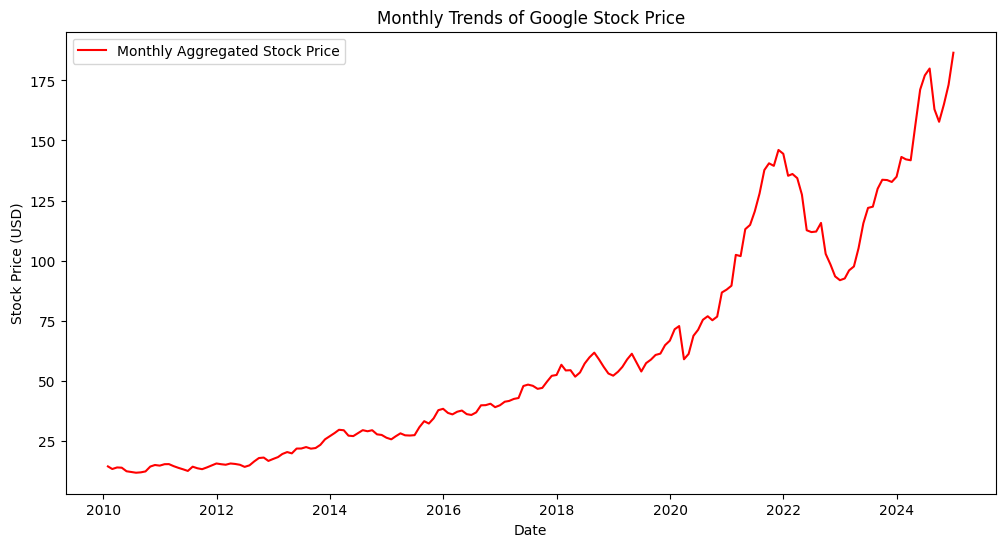

In [4]:
monthly_data=df['Close'].resample('ME').mean()
plt.figure(figsize=(12,6))
plt.plot(monthly_data,label='Monthly Aggregated Stock Price',color='red')
plt.title('Monthly Trends of Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


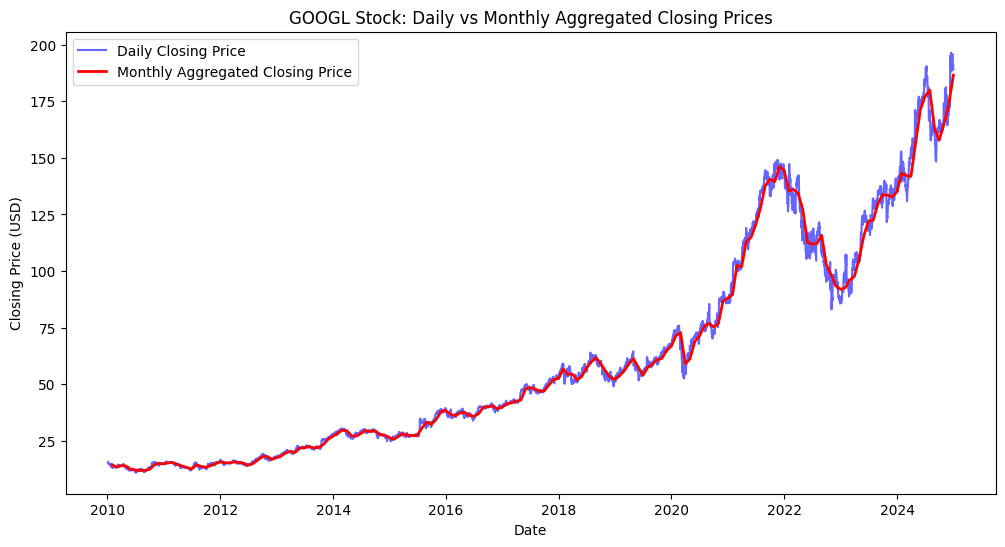

In [5]:
plt.figure(figsize=(12, 6))
# Plot daily closing prices (before aggregation)
plt.plot(df['Close'], label='Daily Closing Price', alpha=0.6, color='blue')

# Plot monthly aggregated closing prices (after aggregation)
plt.plot(monthly_data, label='Monthly Aggregated Closing Price', color='red', linewidth=2)

plt.title('GOOGL Stock: Daily vs Monthly Aggregated Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

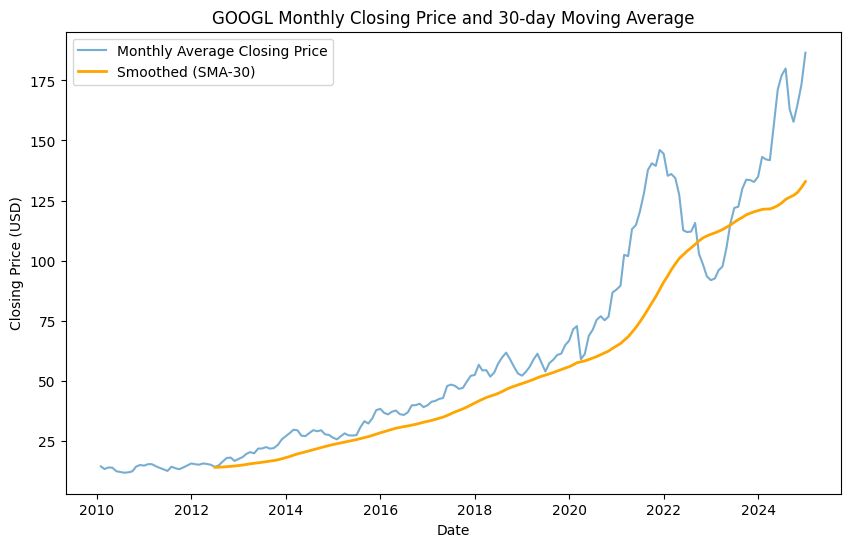

In [6]:
# Applying a moving average with a window size of 30 days
window_size = 30
monthly_data_sma = monthly_data.rolling(window=window_size).mean()

# Plotting the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(monthly_data_sma, label=f'Smoothed (SMA-{window_size})', color='orange', linewidth=2)
plt.title(f'GOOGL Monthly Closing Price and {window_size}-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

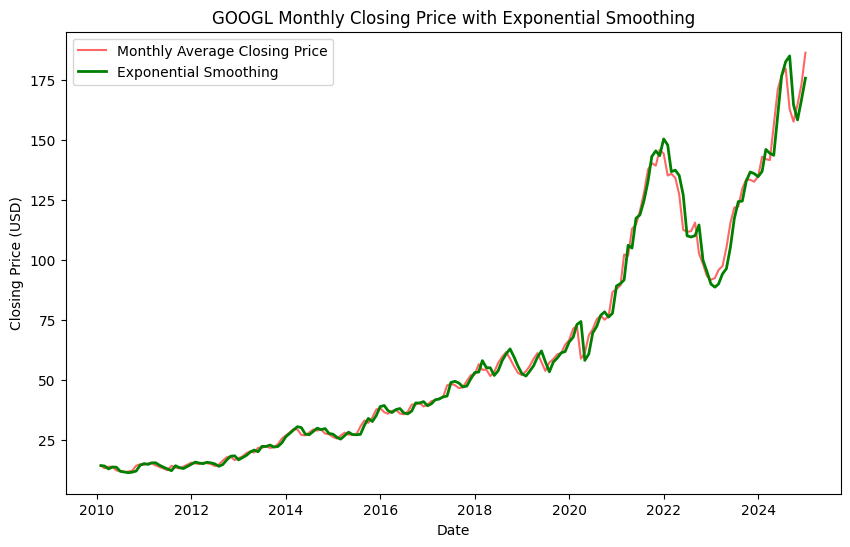

In [7]:
model = ExponentialSmoothing(monthly_data, trend='add', seasonal=None, damped_trend=False)
fit_model = model.fit()

# Forecast smoothed values
monthly_data_smooth = fit_model.fittedvalues

# Plotting the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price',color='red', alpha=0.6)
plt.plot(monthly_data_smooth, label='Exponential Smoothing', color='green', linewidth=2)
plt.title('GOOGL Monthly Closing Price with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()